# Дз 3. Тестирование статистических гипотез

<div class="alert alert-info" role="alert">

Важно!

* Плагиат карается обнулением работы
* При использовании чужого кода из открытых источников необходимо указать ссылку на источник
* В каждой задаче необходимо обосновывать выбор статистического критерия, формулировать нулевую и альтернативную гипотезу и делать интерпретацию получившихся результатов, а также содержательный вывод.
* Весь текст оформляется строго в ячейках типа markdown

## Задача 1. Осьминог Пауль (2 балла)


* В период с 2008 по 2010 год в Германии жил Осьминог Пауль, который был известен тем, что мог предсказывать результаты матчей с участием сборной Германии.     
   
* В таблице ниже вы можете видеть результаты его предсказаний: 


<a href="https://ibb.co/VWnc5yG"><img src="https://i.ibb.co/QFS3tBV/image.jpg" alt="image" border="0"></a>

* Если считать, что случайным образом мы угадывали ли бы 50% матчей, то можно ли утверждать, что осьминог Пауль был талантливым экстрасенсом со способностями к предсказаниям?

На семинаре мы разбирали похожую задачу про даму (похожую на монету), которая угадывала рецепт чая. Осьминог предсказывает правильный или неправильный результат матча со сборной Германии. Если фиксировать выбор Пауля, то Германия - 0, соперник - 1. Данная величина будет иметь распределение Бернулли.

H0: P = 1/2

H1: P > 1/2 альтернативная гипотеза такая, т.к. чтобы Пауль был талантливым экстрасенсом, он должен угадывать с большей вероятностью

Сумма 13 (количество матчей) одинаково распределённых бернуллиевских случайных величин с параметром $p$ имеет биномиальное распределение $Bin(13, p)$. Тогда нулевое распределение статистики $T$ — $Bin\left(13, \frac1{2}\right)$. Т.к. количество матчей небольшое, используется тест Фишера. 


Зафиксирую уровень значимости $\alpha$ = 5%. 

In [150]:
import numpy as np
import pandas as pd
from scipy import stats
import scipy

n = 13
F_H0 = stats.binom(n, 0.5)
stats.binom_test(11, 13, 0.5, alternative = 'greater') 

0.01123046875

Получили значение p-value = 0.01123046875. p-value < $\alpha$, значит, на уровне значимости 5% не принимаем гипотезу Н0 (отвергаем в пользу альтернативной). Таким образом, у Осьминога Пауля действительно были способности к предсказаниям.

## Задача 2.  Корм и котики (2 балла)

    
* Новый корм для котиков рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше.

* Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в табличке.

* Можно ли утверждать, что оба баннера одинаково хороши? Сформулируйте статистическую гипотезу для проверки того, что оба баннера выбирают одинаково часто. Проверьте ее и сделайте выводы.


In [151]:
catfood = pd.read_csv('banner_click_stat.csv', sep = '\t', header = None)

sep = '\t', для того, чтобы csv файл корректно открывался, header = None, чтобы первая строка не записывалась автоматически в заголовок, поменяю названия колонок и проверю данные на наличие пропущенных значений (получилось, что таких значений нет)

In [152]:
catfood.rename(columns = {0: 'Banner_A'}, inplace = True)

In [153]:
catfood.rename(columns = {1: 'Banner_B'}, inplace = True)

In [154]:
catfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Banner_A  1000 non-null   int64
 1   Banner_B  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [196]:
catfood

,Banner_A,Banner_B
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
995,0,0
996,0,0
997,0,0
998,0,0


В выборке предствленно 1000 наблюдений, это довольно много. Также, я делаю вывод о том, что выборки зависимы, потому что оба баннера каждый раз оценивают одни и те же люди, значит, использовать z-тест нельзя. Критерий знаков - аналогичный параметрический тест, используется при проверке нулевой гипотезы о равенстве нулю медианы разности для двух связанных выборок, воспользуюсь этим тестом

Нулевая гипотеза - оба баннера одинаково хороши, альтернативная - один из баннеров лучше или хуже.

ma - медиана выборки банннера А, mb - медиана выборки баннера Б

Н0: ma-mb = 0

H1: ma-mb !=0

Зафиксирую уровень значимости $\alpha$ = 5%. 

In [155]:
from statsmodels.stats.descriptivestats import sign_test

In [156]:
sign_test(catfood['Banner_A'] - catfood['Banner_B'])

(-8.0, 0.005222879350185395)

Получили значение p-value = 0.005222879350185395. p-value < $\alpha$, значит, на уровне значимости 5% не принимаем гипотезу Н0 (отвергаем в пользу альтернативной). Таким образом, баннер А и баннер Б выбирают НЕ одинаково часто (разница медиан не равна нулю)

## Задача 3. Немного АВ-тестов (3 балла)
## Игра Cookie Cat

В этом задании мы поработаем с данными Cookie Cats - популярной игры-головоломки, которую разработала компания Tactile Entertainment. В этой игре игрок должен соединять одинаковые элементы в ряд, чтобы очистить поле и выиграть уровень. 

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


По мере прохождения уровней перед игроками появляются ворота, открытия которых нужно ждать какое-то время или пропускать их, совершая покупки в приложении. С точки зрения создателей эти ворота повышают интерес к игре и стимулируют к вложению денег в игру.


Но у создателей появляется важный вопрос: **где лучше всего ставить ворота?**
Первоначально первые ворота были размещены на уровне 30. Однако есть гипотеза, что лучше переместить их на уровень 40. В этом задании вам предлагается проанализировать результаты AB-теста, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - вернулся ли игрок в игру через 1 день после установки
* `retention_7` - вернулся ли игрок в игру через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [157]:
import pandas as pd
catgame = pd.read_csv('cookie_cats.csv')
catgame.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [158]:
catgame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


### Вопрос 1: есть ли зависимость между возвращаемостью игроков и расположением ворот?

### **1.1 Проверьте гипотезу для возвращения через день**

Так как нужно проверить есть ли зависимость между возвращаемостью игроков от того, где поставить ворота, надо сгруппировать данные по воротам. Иными словами нам нужно проверить наличие взаимосвязи между двумя признаками. Для этого используется критерий независимости Хи-квадрат Пирсона.

H0: взаимосвязи между возвращаемостью игроков через день и расположением ворот нет

Н1: взаимосвязь между возвращаемостью игроков через день и расположением ворот есть

Зафиксирую уровень значимости $\alpha$ = 5%. 

In [159]:
game_1 = catgame.groupby('version')['retention_1'].value_counts().unstack()
game_1

retention_1,False,True
version,,
gate_30,24666,20034
gate_40,25370,20119


In [160]:
stats.chi2_contingency(game_1, correction=False)

(3.182963657512031,
 0.07440965529692188,
 1,
 array([[24799.13514952, 19900.86485048],
        [25236.86485048, 20252.13514952]]))

Получили значение p-value = 0.07440965529692188. p-value > $\alpha$, значит, на уровне значимости 5%  гипотезу Н0 не отвергаем. Таким образом, взаимосвязи между возвращаемостью игороков через день и расположением ворот нет

### **1.2 Проверьте гипотезу для возвращения через семь дней**

Аналогично предыдущему пункту воспользуемся критерием независимости Хи-квадрат Пирсона, также сгруппируем по воротам

H0: взаимосвязи между возвращаемостью игроков через 7 дней и расположением ворот нет

Н1: взаимосвязь между возвращаемостью игроков через 7 дней и расположением ворот есть

Зафиксирую уровень значимости $\alpha$ = 5%. 

In [161]:
game_7 = catgame.groupby('version')['retention_7'].value_counts().unstack()
game_7

retention_7,False,True
version,,
gate_30,36198,8502
gate_40,37210,8279


In [162]:
stats.chi2_contingency(game_7, correction=False)

(10.013167328688969,
 0.0015542499756142805,
 1,
 array([[36382.90257127,  8317.09742873],
        [37025.09742873,  8463.90257127]]))

Получили значение p-value = 0.0015542499756142805. p-value < $\alpha$, значит, на уровне значимости 5%  гипотезу Н0 не принимаем (отвергаем в пользу альтернативной). Таким образом, взаимосвязь между возвращаемостью игороков через 7 дней и расположением ворот есть.

### **Вопрос 2: Отличается ли среднее количество раундов в группах gate_40 и gate_30?**

Отмечу, нам даны десятки тысяч наблюдейний (точнее - 90188), тогда выборочное распределение стремится к нормальному. Для проверки гипотез о среднем между независимыми выборками с большим кол-вом наблюдений используется z-тест, однако нам не даны значения дисперсий генеральных совокупностей, поэтому воспользуемся t-тестом для независимых выборок.

H0: $\mu = \mu_0$

H1: $\mu \neq \mu_0$

(мю - среднее)

Зафиксирую уровень значимости $\alpha$ = 5%. 

In [163]:
g30 = catgame[catgame['version'] == 'gate_30']['sum_gamerounds']
g40 = catgame[catgame['version'] == 'gate_40']['sum_gamerounds']
g30.name, g40.name = 'gate_30', 'gate_40'

In [164]:
from scipy.stats import ttest_ind

In [165]:
ttest, pval = ttest_ind(g30, g40, alternative = 'two-sided')
print(ttest, pval)

0.8910426211362967 0.37290868247405207


Получили значение p-value = 0.37290868247405207. p-value > $\alpha$, значит, на уровне значимости 5%  гипотезу Н0 не отвергаем. Таким образом, среднее количество раундов в группах gate_30 и gate_40 не отличается

### **Вопрос 3: Отличается ли медианное количество раундов в группах gate_40 и gate_30?**

Так как обе выборки независимы, у обеих выборок огромное количество наблюдений, они обе стремятся к нормальному распределению, значит для тестирования гипотезы о равенстве медианного кол-ва раундов можно использовать критерий Манна-Уитни.

Н0: медианное кол-во раундов в gate_30 и в gate_40 равно

Н1: медианное кол-во раундов в gate_30 и в gate_40 не равно

Зафиксирую уровень значимости $\alpha$ = 5%. 

In [166]:
g30m = catgame[catgame['version'] == 'gate_30']['sum_gamerounds']
g40m = catgame[catgame['version'] == 'gate_40']['sum_gamerounds']
g30m.name, g40m.name = 'gate_30', 'gate_40'

In [167]:
medianaresult = stats.mannwhitneyu(g30m, g40m, alternative = 'two-sided')
print('p-value:', medianaresult[1])

p-value: 0.05020880772044255


Получили значение p-value = 0.05020880772044255. p-value > $\alpha$ (чуть-чуть, но все таки больше), значит, на уровне значимости 5%  гипотезу Н0 не отвергаем. Таким образом, медианное количество раундов в группах gate_30 и gate_40 не отличается

в какой то момент выполнения задания я задумалась и решила посмотреть на результаты, если избавиться от выбросов, от выбросов избавляемся по столбцу sum_gamerounds, тк он содержит количественные данные
далее я проделала все те же тесты что и сверху, только с новыми данными, я не стану их подробно расписывать и интерпретировать полностью, посмотрю подробнее на результат, только если результат будет отличаться от результатов выше 

In [168]:
new = catgame.copy()

In [169]:
q25 = np.quantile(new['sum_gamerounds'], 0.25)
q75 = np.quantile(new['sum_gamerounds'], 0.75)
IQR = q75 - q25
minn = q25 - (1.5*IQR)
maxx = q75 + (1.5*IQR)

In [170]:
print(q25)
print(q75)
print(IQR)
print(minn)
print(maxx)

5.0
51.0
46.0
-64.0
120.0


In [171]:
new.loc[new['sum_gamerounds'] < minn, 'sum_gamerounds'] = np.nan
new.loc[new['sum_gamerounds'] > maxx, 'sum_gamerounds'] = np.nan

In [172]:
new.isnull().sum()

userid                0
version               0
sum_gamerounds    10177
retention_1           0
retention_7           0
dtype: int64

In [173]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          90189 non-null  int64  
 1   version         90189 non-null  object 
 2   sum_gamerounds  80012 non-null  float64
 3   retention_1     90189 non-null  bool   
 4   retention_7     90189 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [174]:
new = new.dropna()

In [175]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80012 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          80012 non-null  int64  
 1   version         80012 non-null  object 
 2   sum_gamerounds  80012 non-null  float64
 3   retention_1     80012 non-null  bool   
 4   retention_7     80012 non-null  bool   
dtypes: bool(2), float64(1), int64(1), object(1)
memory usage: 2.6+ MB


In [176]:
#1.1
new_game_1 = new.groupby('version')['retention_1'].value_counts().unstack()
stats.chi2_contingency(new_game_1, correction=False)

(2.7710619216570604,
 0.09598246591228103,
 1,
 array([[24329.62328151, 15308.37671849],
        [24781.37671849, 15592.62328151]]))

In [177]:
#1.2
new_game_7 = new.groupby('version')['retention_7'].value_counts().unstack()
stats.chi2_contingency(new_game_7, correction=False)

(13.718054474978015,
 0.00021240277684543275,
 1,
 array([[35122.42271159,  4515.57728841],
        [35774.57728841,  4599.42271159]]))

In [178]:
#2
new_g30 = new[new['version'] == 'gate_30']['sum_gamerounds']
new_g40 = new[new['version'] == 'gate_40']['sum_gamerounds']
new_g30.name, new_g40.name = 'gate_30', 'gate_40'
ttest, pval = ttest_ind(new_g30, new_g40, alternative = 'two-sided')
print(ttest, pval)

-0.34674581278382155 0.7287832012343212


In [179]:
#3
new_g30m = new[new['version'] == 'gate_30']['sum_gamerounds']
new_g40m = new[new['version'] == 'gate_40']['sum_gamerounds']
new_g30m.name, new_g40m.name = 'gate_30', 'gate_40'
medianaresult = stats.mannwhitneyu(new_g30m, new_g40m, alternative = 'two-sided')
print('p-value:', medianaresult[1])

p-value: 0.03885510150342266


Напомню, уровень значимости alpha = 5%
В данном случае у нас получился другой результат. В изначальном варинате p-value > alpha, поэтому там не отвергали Н9, здесь же наоборот, p-value < alpha, значит не принимаем Н0 (отвергаем в сторону альтернативной гипотезы)

Интересно, я могу для себя сделать вывод, что тестирование гипотез зависит от того, очищены данные или нет, поэтому нужно исходить из ситуации, в которой находишься.

В данном случае нельзя точно осказать, дали ли нам очищенные данные или нет, поэтому нельзя сделать четкий вывод о том, какие результаты тестирования гипотез правильные. Я сделала и так и так

## Задача 4: Время покемонов (3 балла)

В данной задаче вам будет необходимо проанализировать различные характеристики покемонов и сравнить их между собой

<p style="align: center;"><img align=center src="https://proprikol.ru/wp-content/uploads/2020/11/kartinki-pokemonov-2.jpg"  width=500></p>

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* pid: Numeric - ID покемона
* HP: Numeric - Очки здоровья
* Attack: Numeric - Сила обычной атаки
* Defense: Numeric - Сила обычной защиты
* Sp. Atk: Numeric - Сила специальной атаки
* Sp. Def: Numeric - Сила специальной защиты
* Speed: Numeric - Скорость движений
* Legendary: Boolean - «True», если покемон редкий
* Class 1: Categorical - Класс покемона
* Class 2: Categorical - Класс покемона

In [180]:
pkmn = pd.read_csv('pokemon.csv')
pkmn.info()
pkmn.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        800 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    800 non-null    object
 3   Class 2    414 non-null    object
 4   HP         800 non-null    int64 
 5   Attack     800 non-null    int64 
 6   Defense    800 non-null    int64 
 7   Sp. Atk    800 non-null    int64 
 8   Sp. Def    800 non-null    int64 
 9   Speed      800 non-null    int64 
 10  Legendary  800 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 63.4+ KB


,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


Ого, у нас есть пропущенное значение в столбце с именами, данную строку нужно удалить, тк пропущенное имя покемона ничем нельзя заполнить. функцию notna чтобы дропнуть строку взяла отсюда https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-a-certain-column-is-nan

In [181]:
pkmn = pkmn[pkmn['Name'].notna()]

In [182]:
pkmn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 0 to 799
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   pid        799 non-null    int64 
 1   Name       799 non-null    object
 2   Class 1    799 non-null    object
 3   Class 2    414 non-null    object
 4   HP         799 non-null    int64 
 5   Attack     799 non-null    int64 
 6   Defense    799 non-null    int64 
 7   Sp. Atk    799 non-null    int64 
 8   Sp. Def    799 non-null    int64 
 9   Speed      799 non-null    int64 
 10  Legendary  799 non-null    bool  
dtypes: bool(1), int64(7), object(3)
memory usage: 69.4+ KB


In [183]:
pkmn['Class 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [184]:
pkmn['Class 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

### Вопрос 1

Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически. 

Выше можно увидеть что классы повторяются и в Class 1 и в Class 2, поэтому для анализа я буду использовать только признак Class 1, тк в Class 2 очень много пропущенных значений.

Нужно опять сгруппировать данные, на этот раз данные по силе аттаки по классам grass и rock

In [185]:
import seaborn as sns

<AxesSubplot:xlabel='Attack', ylabel='Count'>

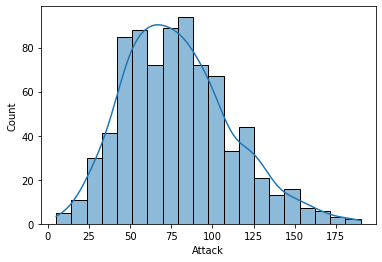

In [186]:
sns.histplot(data = pkmn['Attack'], kde = True)

Распределение признака близко к нормальному

In [187]:
grass = pkmn[pkmn['Class 1'] == 'Grass']['Attack']
rock = pkmn[pkmn['Class 1'] == 'Rock']['Attack']
grass.name, rock.name = 'grass', 'rock'

Во-первых, нужно проверить гипотезу о среднем, во-вторых, распределение близко к нормальному, в третьих, выборка относительно мала (всего 799 наблюдений), в-четвертых, выборки независимы (я считаю, что они независимы, так как мы не измеряем изменение одного признака через промежуток времени, на эти признаки ничто общее не влияет). При таких вводных используется t-тест.

H0: $\mu_g = \mu_r$

H1: $\mu_g > \mu_r$

(мю - среднее)

Зафиксирую уровень значимости $\alpha$ = 5%.  

In [188]:
ttest, pval = stats.ttest_ind(grass, rock, 0, alternative = 'greater')
print(ttest, pval)

-3.450882886571366 0.9996055325966033


Получили значение p-value = 0.9996055325966033. p-value > $\alpha$, значит, на уровне значимости 5% гипотезу Н0 не отвергаем. Таким образом, нельзя сказать, что у покемонов grass более сильная обычная атака, чем у покемонов rock

 Из интереса проверю гипотезу, что наоборот, rock сильнее grass

H0: $\mu_r = \mu_g$

H1: $\mu_r > \mu_g$

(мю - среднее)

Зафиксирую уровень значимости $\alpha$ = 5%.  


In [189]:
ttest, pval = stats.ttest_ind(rock, grass, 0, alternative = 'greater')
print(ttest, pval)

3.450882886571366 0.00039446740339659745


Вот, теперь получили значение p-value = 0.00039446740339659745. p-value < $\alpha$, значит, на уровне значимости 5% гипотезу Н0 не принимаем (отвергаем в пользу альтернативной). Таким образом, у покемонов rock более сильная обычная атака, чем у покемонов grass

### Вопрос 2

Также профессор Оук очень хочет проверить, правда ли нет значимой разницы между силой обычной атаки и силой обычной защиты у покемонов. Помогите ему и ответьте на вопрос, подтвердив свои выводы с помощью проверки статистических гипотез

<AxesSubplot:xlabel='Defense', ylabel='Count'>

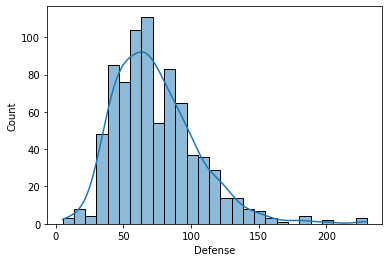

In [190]:
sns.histplot(data = pkmn['Defense'], kde = True)

Аналогично предыдущему пункту распределение defense близко к нормальному, также нужно проверить гипотезу о среднем, обе выборки все также относительно малы и независимы. Используем t-тест

H0: $\mu_a = \mu_d$

H1: $\mu_a \not= \mu_d$

(мю - среднее)

Зафиксирую уровень значимости $\alpha$ = 5%.  


In [191]:
ttest, pval = stats.ttest_ind(pkmn['Attack'], pkmn['Defense'], 0, alternative = 'two-sided')
print(ttest, pval)

3.207274676881722 0.0013665550776650538


Получили значение p-value = 0.0013665550776650538. p-value < $\alpha$, значит, на уровне значимости 5% гипотезу Н0 не принимаем (отвергаем в сторону альтернативной). Таким образом, разница между силой обычной атаки и силой обычной защиты у покемонов есть

Из интереса проверю односторонние гипотезы

H0: $\mu_a = \mu_d$

H1: $\mu_a < \mu_d$

(мю - среднее)

Зафиксирую уровень значимости $\alpha$ = 5%.  

In [192]:
ttest, pval = stats.ttest_ind(pkmn['Attack'], pkmn['Defense'], 0, alternative = 'less')
print(ttest, pval)

3.207274676881722 0.9993167224611675


Получили значение p-value = 0.9993167224611675. p-value > $\alpha$, значит, на уровне значимости 5% гипотезу Н0 не отвергаем. Таким образом, нельяз утверждать, что сила обычной атаки меньше силы обычной защиты у покемонов 

H0: $\mu_a = \mu_d$

H1: $\mu_a > \mu_d$

(мю - среднее)

Зафиксирую уровень значимости $\alpha$ = 5%.  

In [193]:
ttest, pval = stats.ttest_ind(pkmn['Attack'], pkmn['Defense'], 0, alternative = 'greater')
print(ttest, pval)

3.207274676881722 0.0006832775388325269


Получили значение p-value = 0.0006832775388325269. p-value < $\alpha$, значит, на уровне значимости 5% гипотезу Н0 не принимаем (отвергаем в сторону альтернативной). Таким образом, сила обычной атаки больше силы обычной защиты

### Вопрос 3

И последний вопрос, который мучает профессора Оука: правда ли, что средняя скорость покемонов превышает 66.6 ? Сформулируйте подходящие гипотезы и помогите профессору Оуку, ответив на вопрос.

<AxesSubplot:xlabel='Speed', ylabel='Count'>

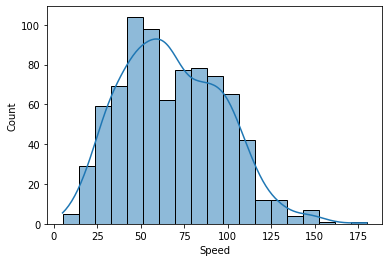

In [194]:
sns.histplot(data = pkmn['Speed'], kde = True)

Я считаю, что данное распределение стремится и близко к нормальному.

Здесь просят проверить гипотезу о равенстве среднего какому-то числу, в таких случаях используется t-тест по одной выборке

Н0: $\mu_a = 66,6$

H1: $\mu_a > 66,6$

Зафиксирую уровень значимости $\alpha$ = 5%.  

In [195]:
stats.ttest_1samp(pkmn['Speed'], popmean = 66.6, alternative = 'greater')

Ttest_1sampResult(statistic=1.5989884605854279, pvalue=0.05510949908488242)

Получили значение p-value = 0.05510949908488242. p-value > $\alpha$, значит, на уровне значимости 5% гипотезу Н0 не отвергаем. Таким образом, средняя скорость покемонов не превышает 66,6

В данной задаче я не стала проверять выбросы, так как посчитала все данные релевантными из-за относительно маленькой выборки